In [1]:
# Import the modules
import numpy as np 
import pandas as pd 
from pathlib import Path 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_df = pd.read_csv(
    Path("Resources/lending_data.csv")
)

# Review the DataFrame
display(lending_df.head())
display(lending_df.tail())

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1
77535,15600.0,9.742,72300,0.585062,9,2,42300,1


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_df['loan_status']

# Separate the X variable, the features
X = lending_df.drop(columns=['loan_status'])

In [4]:
# Review the y variable Series
y.head()


0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [6]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [7]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

c:\Users\gilbe\anaconda3\envs\dev\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [8]:
# Make a prediction using the testing data
testing_predictions = logistic_regression_model.predict(X_test)


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

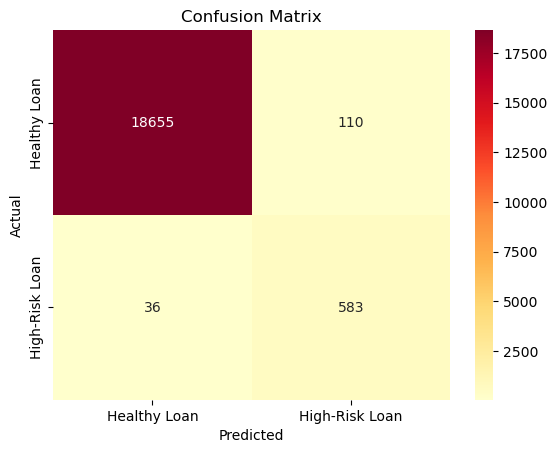

In [9]:
# Generate a confusion matrix for the model
testing_matrix = confusion_matrix(y_test, testing_predictions)

# Define class labels for your problem (e.g., "Positive" and "Negative")
class_labels = ["Healthy Loan", "High-Risk Loan"]

# Create a heatmap
sns.heatmap(testing_matrix, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=class_labels, yticklabels=class_labels)

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [10]:
# Print the classification report for the model
testing_report = classification_report(y_test, testing_predictions, target_names=['Healthy loan (0)', 'High-Risk Loan (1)'])
print(testing_report)


                    precision    recall  f1-score   support

  Healthy loan (0)       1.00      0.99      1.00     18765
High-Risk Loan (1)       0.84      0.94      0.89       619

          accuracy                           0.99     19384
         macro avg       0.92      0.97      0.94     19384
      weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model demonstrates strong performance in predicting both healthy and high-risk loans. It achieves a precision of 0.85 for high-risk loans, meaning it makes fewer false positive predictions for this category. With a recall of 0.91 for high-risk loans, the model successfully identifies a large proportion of high-risk loans. Its overall accuracy stands at 0.99, indicating high effectiveness in predicting both healthy and high-risk loans.

However, the correlation coefficient and VIF scores indicate multicollinearity among at least two or more independent variables. This complicates the calculation of coefficients for each independent variable and hinders accurate assessment of their impact on the dependent variable, also increasing the risk of overfitting. To potentially enhance the model, consider the following:

Remove one or more of the highly correlated variables.

Combine correlated variables into composite variables.

Gather more data to better distinguish the relationships between the variables.

---